<a href="https://colab.research.google.com/github/mdniyajali/labsheet-4-machine-learning/blob/main/Regression_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Regression**

In [ ]:
!pip install quandl -q
# https://doc.exabel.com/dsl/data/quandl.html

In [ ]:
import numpy as np

# Data
dataX = np.array([6, 12, 14, 6, 9, 13, 15, 9])
dataY = np.array([300, 400, 560, 250, 290, 650, 630, 520])
X = 15

# Calculate averages
dataXAvg = np.mean(dataX)
dataYAvg = np.mean(dataY)

# Deviation from the mean
x = dataX - dataXAvg
y = dataY - dataYAvg

# Calculate products and squares
xy = x * y
xSqr = x ** 2
ySqr = y ** 2

# Summations
sumxy = np.sum(xy)
sumxSqr = np.sum(xSqr)
sumySqr = np.sum(ySqr)

# Correlation coefficient
rCoefficient = sumxy / np.sqrt(sumxSqr * sumySqr)

# Regression coefficients
b = sumxy / sumxSqr
a = dataYAvg - b * dataXAvg

# Predict Y for given X
Y = a + b * X

# Output results
print("Correlation Coefficient (r):", rCoefficient)
print("Intercept (a):", a)
print("Slope (b):", b)
print("Predicted Y for X =", X, ":", Y)


Correlation Coefficient (r): 0.8463670653459558
Intercept (a): 43.43023255813955
Slope (b): 38.72093023255814
Predicted Y for X = 15 : 624.2441860465117


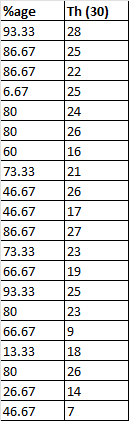

In [ ]:
import pandas as pd
import quandl
df=quandl.get("WIKI/GOOGL")
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [ ]:
# Data types of each column
print(df.dtypes)

Open           float64
High           float64
Low            float64
Close          float64
Volume         float64
Ex-Dividend    float64
Split Ratio    float64
Adj. Open      float64
Adj. High      float64
Adj. Low       float64
Adj. Close     float64
Adj. Volume    float64
dtype: object


In [ ]:
# Summary of the dataset
df.describe(include='all')

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,3424.000000,3424.000000,3424.000000,3424.000000,3.424000e+03,3424.000000,3424.0,3424.000000,3424.000000,3424.000000,3424.000000,3.424000e+03
mean,596.602610,602.045438,590.571710,596.352862,7.818568e+06,0.165880,1.0,409.221461,412.786556,405.227809,409.057885,7.818568e+06
std,226.989782,227.783310,225.846581,226.896692,8.248211e+06,9.706436,0.0,257.844081,259.366718,255.981628,257.773495,8.248211e+06
min,99.090000,101.740000,95.960000,100.010000,5.211410e+05,0.000000,1.0,49.698414,51.027517,48.128568,50.159839,5.211410e+05
25%,461.157500,465.392500,456.065000,461.205000,2.430647e+06,0.000000,1.0,231.292728,233.416785,228.738594,231.316552,2.430647e+06
50%,565.120000,569.599950,559.860000,564.940000,5.076200e+06,0.000000,1.0,300.174109,302.496277,297.909618,300.264387,5.076200e+06
75%,735.627500,740.850000,728.680025,733.262500,1.020910e+07,0.000000,1.0,561.178118,565.000000,556.673036,561.200000,1.020910e+07
max,1226.800000,1228.880000,1218.600000,1220.170000,8.215110e+07,567.971668,1.0,1188.000000,1198.000000,1184.060000,1187.560000,8.215110e+07


In [ ]:
# # Use selected Columns
# df_min=df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]
# df_min['HL_PCT']=(df_min['Adj. High']-df_min['Adj. Close'])/df_min['Adj. Close']*100.0
# df_min['PCT_change']=(df_min['Adj. Close']-df_min['Adj. Open'])/df_min['Adj. Open']*100.0
# df_min.head()

# Use selected Columns
df_min = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']].copy()  # Ensure df_min is a copy, not a view
df_min.loc[:, 'HL_PCT'] = (df_min['Adj. High'] - df_min['Adj. Close']) / df_min['Adj. Close'] * 100.0
df_min.loc[:, 'PCT_change'] = (df_min['Adj. Close'] - df_min['Adj. Open']) / df_min['Adj. Open'] * 100.0
print(df_min.head())

            Adj. Open  Adj. High   Adj. Low  Adj. Close  Adj. Volume  \
Date                                                                   
2004-08-19  50.159839  52.191109  48.128568   50.322842   44659000.0   
2004-08-20  50.661387  54.708881  50.405597   54.322689   22834300.0   
2004-08-23  55.551482  56.915693  54.693835   54.869377   18256100.0   
2004-08-24  55.792225  55.972783  51.945350   52.597363   15247300.0   
2004-08-25  52.542193  54.167209  52.100830   53.164113    9188600.0   

              HL_PCT  PCT_change  
Date                              
2004-08-19  3.712563    0.324968  
2004-08-20  0.710922    7.227007  
2004-08-23  3.729433   -1.227880  
2004-08-24  6.417469   -5.726357  
2004-08-25  1.886792    1.183658  


In [ ]:
# Select specific columns and fix typo in 'PCT_change'
df_min = df_min[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
df_min.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0
2004-08-20,54.322689,0.710922,7.227007,22834300.0
2004-08-23,54.869377,3.729433,-1.227880,18256100.0
2004-08-24,52.597363,6.417469,-5.726357,15247300.0
2004-08-25,53.164113,1.886792,1.183658,9188600.0


In [ ]:
# Summary of the dataset
df_min.describe(include='all')

,Adj. Close,HL_PCT,PCT_change,Adj. Volume
count,3424.000000,3424.000000,3424.000000,3.424000e+03
mean,409.057885,1.064055,-0.025030,7.818568e+06
std,257.773495,1.134349,1.505326,8.248211e+06
min,50.159839,0.000000,-9.179757,5.211410e+05
25%,231.316552,0.335169,-0.742241,2.430647e+06
50%,300.264387,0.728061,-0.016254,5.076200e+06
75%,561.200000,1.391731,0.752556,1.020910e+07
max,1187.560000,11.157480,8.759770,8.215110e+07


In [ ]:
# Covariance matrix
print(df_min.cov())
# Correlation Matrix
print(df_min.corr())

               Adj. Close        HL_PCT     PCT_change   Adj. Volume
Adj. Close   6.644717e+04 -6.241126e+01       0.692845 -1.169955e+09
HL_PCT      -6.241126e+01  1.286747e+00      -1.216331  3.549820e+06
PCT_change   6.928449e-01 -1.216331e+00       2.266007 -3.089340e+05
Adj. Volume -1.169955e+09  3.549820e+06 -308933.955146  6.803298e+13
             Adj. Close    HL_PCT  PCT_change  Adj. Volume
Adj. Close     1.000000 -0.213441    0.001786    -0.550264
HL_PCT        -0.213441  1.000000   -0.712319     0.379402
PCT_change     0.001786 -0.712319    1.000000    -0.024881
Adj. Volume   -0.550264  0.379402   -0.024881     1.000000


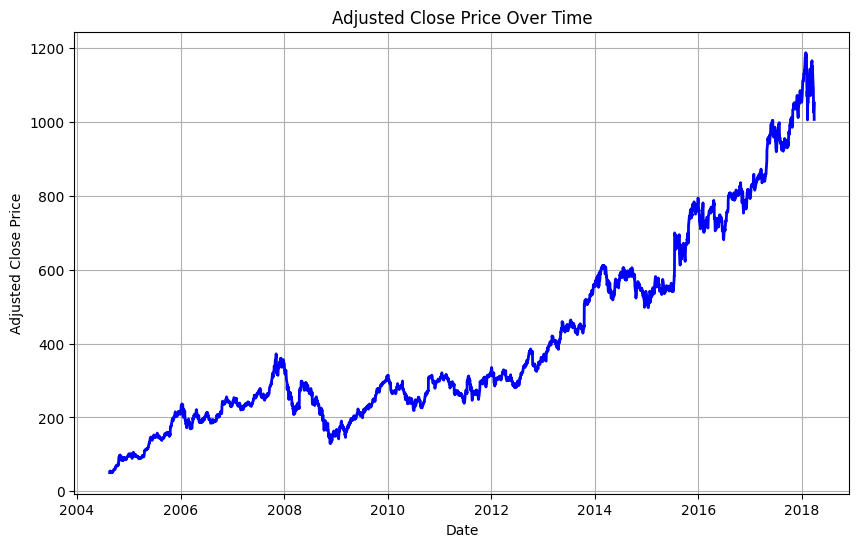

In [ ]:
import matplotlib.pyplot as plt

# Check if the index name is set
if df_min.index.name is not None:
    index_name = df_min.index.name
else:
    index_name = 'Index'

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_min.index, df_min['Adj. Close'], color='blue', linewidth=2)
plt.title('Adjusted Close Price Over Time')
plt.xlabel(index_name)  # Use the index name for x-axis label
plt.ylabel('Adjusted Close Price')
plt.grid(True)
plt.show()


In [ ]:
forecast_col = 'Adj. Close'
df_min.fillna(-9999, inplace = True)

# forecast_out = int(math.ceil(0.01*len(df_min)))
forecast_out = 1

df_min['label'] = df_min[forecast_col].shift(-forecast_out)

df_min.dropna(inplace=True)
print(df_min.head())



            Adj. Close    HL_PCT  PCT_change  Adj. Volume      label
Date                                                                
2004-08-19   50.322842  3.712563    0.324968   44659000.0  54.322689
2004-08-20   54.322689  0.710922    7.227007   22834300.0  54.869377
2004-08-23   54.869377  3.729433   -1.227880   18256100.0  52.597363
2004-08-24   52.597363  6.417469   -5.726357   15247300.0  53.164113
2004-08-25   53.164113  1.886792    1.183658    9188600.0  54.122070


In [ ]:
!pip install pdpbox -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 49.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 10.2 MB/s eta 0:00:00


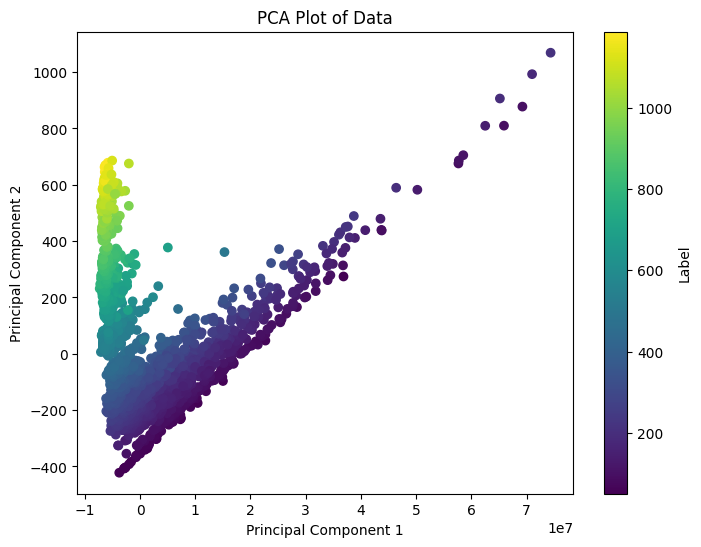

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Prepare the data
X = df_min[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
y = df_min['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the ANN model
ann_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
ann_model.fit(X_train, y_train)
ann_score = ann_model.score(X_test, y_test)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA Plot of Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Label')
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Given data
data = {
    'Date': ['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24', '2004-08-25'],
    'Adj. Close': [50.322842, 54.322689, 54.869377, 52.597363, 53.164113],
    'HL_PCT': [3.712563, 0.710922, 3.729433, 6.417469, 1.886792],
    'PCT_change': [0.324968, 7.227007, -1.227880, -5.726357, 1.183658],
    'Adj. Volume': [44659000.0, 22834300.0, 18256100.0, 15247300.0, 9188600.0]
}

# Convert data to DataFrame
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

print("Explained Variance Ratio:", explained_variance_ratio)

# Results
result_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'], index=df.index)
print("\nResulting Data after PCA:")
print(result_df)


Explained Variance Ratio: [0.53665375 0.39610546]

Resulting Data after PCA:
                 PC1       PC2
Date                          
2004-08-19 -1.255746  2.213573
2004-08-20  2.179601  0.537073
2004-08-23  0.190733 -1.031911
2004-08-24 -1.926232 -1.169119
2004-08-25  0.811644 -0.549617


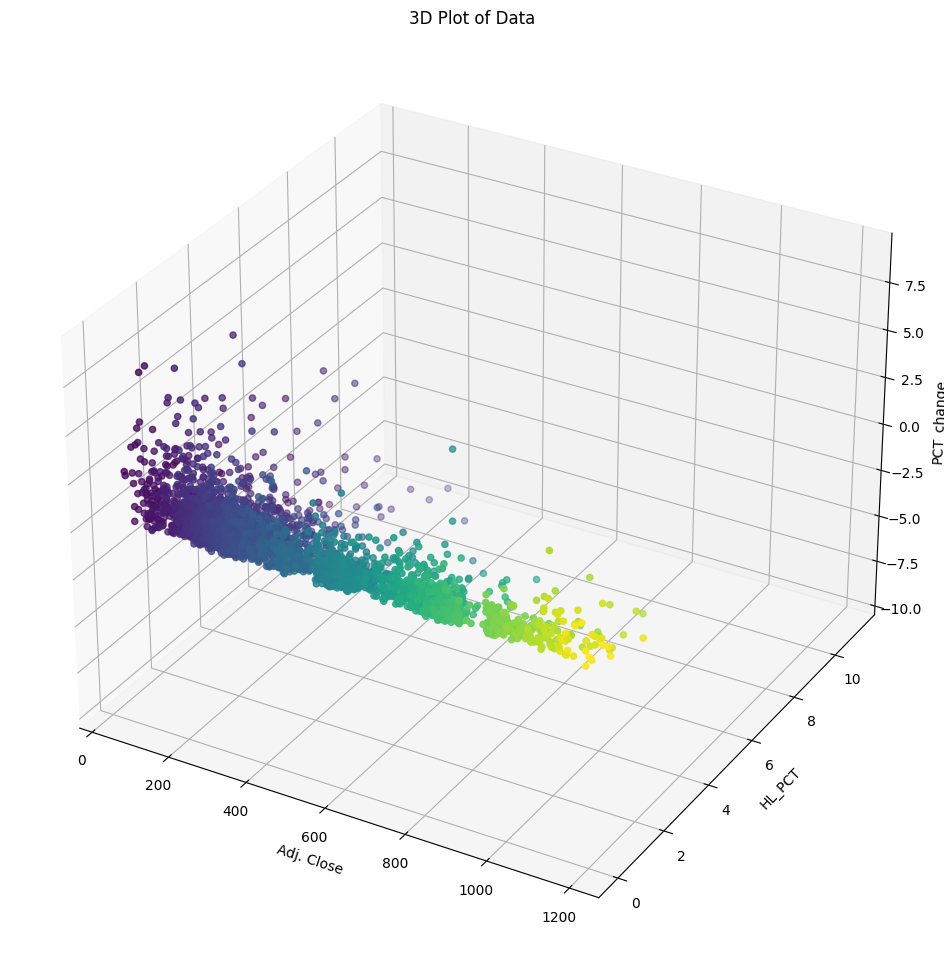

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Prepare the data
X = df_min[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
y = df_min['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the ANN model
ann_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
ann_model.fit(X_train, y_train)
ann_score = ann_model.score(X_test, y_test)

# Plot the data in 3D
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(X['Adj. Close'], X['HL_PCT'], X['PCT_change'], c=y, cmap='viridis')

# Set labels and title
ax.set_xlabel('Adj. Close')
ax.set_ylabel('HL_PCT')
ax.set_zlabel('PCT_change')
ax.set_title('3D Plot of Data')

# Show the plot
plt.show()

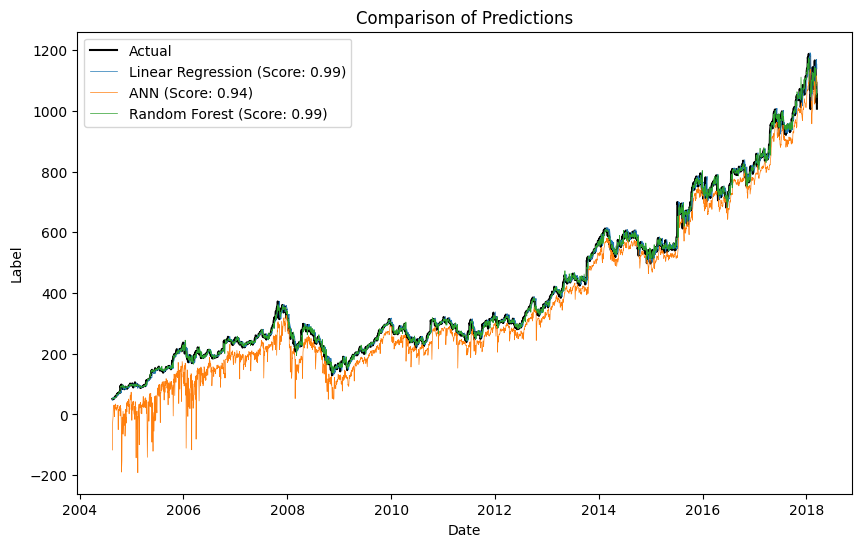

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Prepare the data
X = df_min[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
y = df_min['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_score = lr_model.score(X_test, y_test)

# ANN
ann_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
ann_model.fit(X_train, y_train)
ann_score = ann_model.score(X_test, y_test)

# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_score = rf_model.score(X_test, y_test)

# Visualization
plt.figure(figsize=(10, 6))

# Plotting actual values
plt.plot(df_min.index, y, label='Actual', color='black')

# Plotting linear regression predictions
plt.plot(df_min.index, lr_model.predict(X), label=f'Linear Regression (Score: {lr_score:.2f})', linewidth=0.5)

# Plotting ANN predictions
plt.plot(df_min.index, ann_model.predict(X), label=f'ANN (Score: {ann_score:.2f})', linewidth=0.5)

# Plotting Random Forest predictions
plt.plot(df_min.index, rf_model.predict(X), label=f'Random Forest (Score: {rf_score:.2f})', linewidth=0.5)

plt.title('Comparison of Predictions')
plt.xlabel('Date')
plt.ylabel('Label')
plt.legend()
plt.show()


In [ ]:
import pandas as pd

# Evaluate models and store scores
models = ['Linear Regression', 'ANN', 'Random Forest']
scores = [lr_score, ann_score, rf_score]

# Create a DataFrame for performance comparison
performance_df = pd.DataFrame({'Model': models, 'R-squared Score': scores})

print("Performance Comparison Table:")
print(performance_df)


Performance Comparison Table:
               Model  R-squared Score
0  Linear Regression         0.994283
1                ANN         0.943474
2      Random Forest         0.994836


In [ ]:
import pandas as pd

# Predict values for each model
lr_predicted = lr_model.predict(X)
ann_predicted = ann_model.predict(X)
rf_predicted = rf_model.predict(X)

# Create a DataFrame for actual and predicted values
predictions_df = pd.DataFrame({
    'Date': df_min.index,
    'Actual': y,
    'Linear Regression': lr_predicted,
    'ANN': ann_predicted,
    'Random Forest': rf_predicted
})

# Set 'Date' column as index
predictions_df.set_index('Date', inplace=True)

# Display the DataFrame
print("Table of Predicted Values for 'label' against Actual:")
print(predictions_df)


Table of Predicted Values for 'label' against Actual:
                 Actual  Linear Regression          ANN  Random Forest
Date                                                                  
2004-08-19    51.162935          45.616033  -117.172221      53.594742
2004-08-20    51.343492          52.615478   -32.901870      53.293913
2004-08-23    50.280210          55.293802   -15.030826      51.101395
2004-08-24    50.912161          54.181103    -5.990959      51.358388
2004-08-25    50.159839          54.959210    16.841587      53.434447
...                 ...                ...          ...            ...
2018-03-12  1094.000000        1169.568606  1115.303390    1062.351000
2018-03-13  1053.150000        1143.873970  1090.229362    1069.748300
2018-03-14  1026.550000        1152.514642  1099.232595    1053.939800
2018-03-15  1054.090000        1154.336055  1102.411503    1066.591900
2018-03-16  1006.940000        1138.223391  1083.066177    1043.786600

[3417 rows x 4 columns